In [28]:
import pandas as pd
df=pd.read_csv("Book1.csv",skiprows=0)
df=df.drop(['Serial No.'],axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
#look at the columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [30]:
#we are gonna check if there are any null values with isnull() method
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression### Seperating the dataframe for x and y values - Independent and dependent values

### Seperating the dataframe for x and y values - Independent and dependent values

In [32]:

x=df.iloc[:,:-1]
x.head()
y=df.iloc[:,-1]

#### Now with this, we have x- predictor variables  and y- predictand values

### Now, I'm going to see the correlation between x and y values.

*using whole dataframe*

<AxesSubplot:>

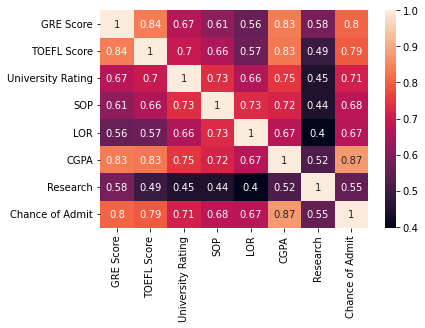

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

#### Clearly, we can see that CGPA and Chance of Admit has highest correlation value- 0.87. 
#### The least correlation is with Research and Chance of Admit- 0.55.  so, we are gonna drop this column for better results

In [34]:
x.head()
x=x.drop(["Research"],axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


### Splitting Data for our Model

In [35]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # this 0.2 value splits whole data into 20% test dataset 
# and 80% train dataset
print(x_train.head())
print(y_train.head())
print(y_train.info())

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA
70         332          118                  5  5.0  5.0  9.64
385        335          117                  5  5.0  5.0  9.82
248        324          110                  3  3.5  4.0  8.87
65         325          112                  4  3.5  3.5  8.92
124        301          106                  4  2.5  3.0  8.47
70     0.94
385    0.96
248    0.80
65     0.55
124    0.57
Name: Chance of Admit, dtype: float64
<class 'pandas.core.series.Series'>
Int64Index: 320 entries, 70 to 386
Series name: Chance of Admit
Non-Null Count  Dtype  
--------------  -----  
320 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
None


In [36]:
model=LinearRegression()
model_fit=model.fit(x_train,y_train)

In [37]:
y_pred=model_fit.predict(x_test.values)

C:\Users\Surekha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### we should now , check the score

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

score=model_fit.score(x_test, y_test)

In [39]:
from sklearn.metrics import mean_squared_error
# Calculation of Mean Squared Error (MSE)
error=mean_squared_error(y_test,y_pred)
print("Score=",score)
print("Error=",error)

Score= 0.7315691666439892
Error= 0.0049975781477138706


### So, Mean Square Error is 0.004 percent


## Now, Let's do Principal Component Analysis

In [40]:
from sklearn.decomposition import PCA
pca=PCA()
data=pca.fit_transform(x)
x.info()
var=pca.explained_variance_ratio_
var=[round(i,3) for i in var]
print(var)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 18.8 KB
[0.936, 0.054, 0.007, 0.002, 0.001, 0.0]


In [63]:
new_x=x[["GRE Score","CGPA"]]
print(new_x.head())


   GRE Score  CGPA
0        337  9.65
1        324  8.87
2        316  8.00
3        322  8.67
4        314  8.21


##### Again, splitting the dataset into train and test variables

In [93]:
newx_train,newx_test,newy_train,newy_test=train_test_split(new_x,y,test_size=0.2)
print(newx_train.head())
print(newy_train.head())

     GRE Score  CGPA
213        333  9.78
128        326  9.10
317        300  8.01
83         322  9.36
72         321  9.45
213    0.96
128    0.84
317    0.58
83     0.92
72     0.93
Name: Chance of Admit, dtype: float64


In [94]:
classifier = LinearRegression()
classifier.fit(newx_train, newy_train)

LinearRegression()

In [95]:
newy_pred = classifier.predict(newx_test)

## We have predicted new y values. now let's see the score of it

In [96]:
score2=classifier.score(newx_test, newy_test)
print(score2)

0.8361902265360305


In [92]:
# I got 83% which is better than the score before

<Figure size 360x504 with 0 Axes>

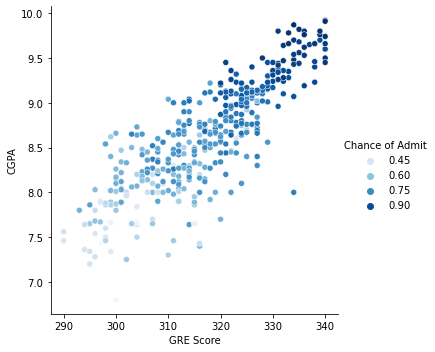

In [97]:
fig = plt.figure(figsize=(5,7))


sns.relplot(x=new_x["GRE Score"],y=new_x["CGPA"],hue=y,palette="Blues")


### From the Plot above, we can see that the chance to getting into University is Higher if GRE and CGPA are high values

## Now, new Mean Square Error is

In [98]:
newerror=mean_squared_error(newy_test,newy_pred)
print(newerror)

0.00338185277316365



## We got new error= 0.003 percent which is lower than the previous error

# So, Clearly, Model that was created using PCA is performing Better than the previous model.

### because we got accuracy higher and Mean Square Error lower

In [101]:
score2=classifier.score(newx_test, newy_test)
print("New Score=",score2*100)
print("New Error=",newerror*100)

New Score= 83.61902265360305
New Error= 0.338185277316365
